This Jupyter notebook shows the code utilized to analyze for bias in the Perspective API.

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

df = pd.read_csv('labeled_and_scored_comments.csv')

Display the dataframe to get a general idea of what the comments are and their rating

In [2]:
df.sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,61a85266de70cca0,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,030a9ba0b32b4456,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,a6814193ac6b4705,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,f0d6dee96e057a5b,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,cbb9268d3c7429c1,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0


In [3]:
df.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,41338.000000,41338.000000,41338.000000,41338.000000,41338.000000,41338.000000,41338.000000
mean,0.244467,0.095384,0.009168,0.053050,0.003024,0.049809,0.009725
std,0.257221,0.293749,0.095313,0.224137,0.054907,0.217553,0.098134
min,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.128969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.998329,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Create visual representations to find the correlation between the label and the score of toxicity

<AxesSubplot:xlabel='toxic', ylabel='score'>

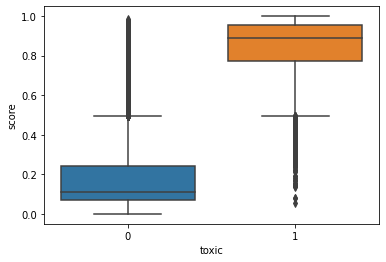

In [4]:
sns.boxplot(data=df, x="toxic", y="score")

<AxesSubplot:xlabel='severe_toxic', ylabel='score'>

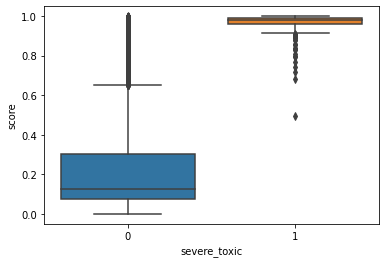

In [5]:
sns.boxplot(data=df, x="severe_toxic", y="score")

<AxesSubplot:xlabel='obscene', ylabel='score'>

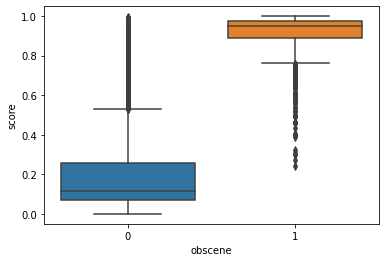

In [6]:
sns.boxplot(data=df, x="obscene", y="score")

<AxesSubplot:xlabel='threat', ylabel='score'>

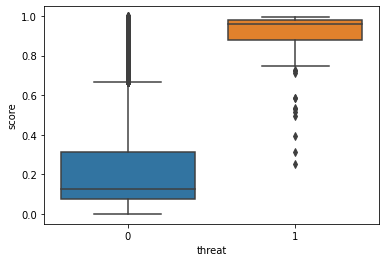

In [7]:
sns.boxplot(data=df, x="threat", y="score")

<AxesSubplot:xlabel='insult', ylabel='score'>

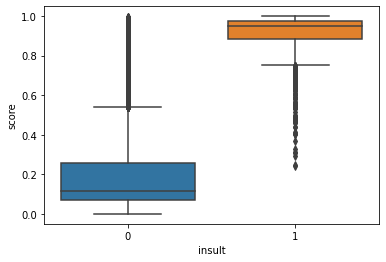

In [8]:
sns.boxplot(data=df, x="insult", y="score")

<AxesSubplot:xlabel='identity_hate', ylabel='score'>

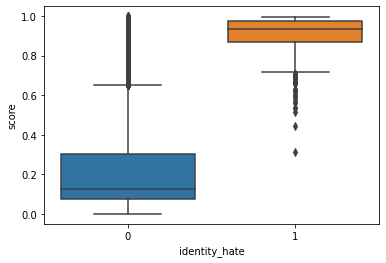

In [9]:
sns.boxplot(data=df, x="identity_hate", y="score") 

Based off of the visuals I will set 0.5 as the threshold for what deems a comment as toxic. The column 'toxic' is the most frequently marked label and from the visual most of the scores that pass the toxic test according to the API is scored above 0.5 

Parse data to find 'toxic' words and how they were scored in context to the comment_text (display.max_colwidth to reveal entire comment)

In [10]:
pd.set_option('display.max_colwidth', None)
df[df['comment_text'].str.contains("stupid")].sort_values(['score'])

id  \
24315  f02c8ccaceec7d74   
14614  6b8e902c4badc55c   
21568  fe620f55dbbd043b   
2053   b117502cbc647666   
6904   e94272539b29dd70   
...                 ...   
23110  f67edd9c9473e8e1   
17349  3e1309cf82d7bdff   
15219  613f3490153d346e   
35749  b25c87ee437e7e51   
28728  d82e45eb103ad07b   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [11]:
df[df['comment_text'].str.contains("cunt")].sort_values(['score'])

id  \
23460  f48a56d1ba31d479   
18467  2bf91b28723a4126   
10614  ada843be122b0d6d   
33452  beee263a92495f20   
12123  944f53d01eda279c   
...                 ...   
28333  da688040f255866b   
32211  c59e19584747453a   
15413  5e4fb1710d0f1493   
26158  e62f588c0c7cb494   
27643  de36b31e15959013   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

When the comment is labled toxic, what is the lowest scored comment and the highest scored comment

In [12]:
df.loc[df['toxic'] == 1].min()

id                                                             00024b59235015f3
comment_text     !\n\nIt is now inside your bones, your head. Haunt you forever
score                                                                  0.054399
toxic                                                                         1
severe_toxic                                                                  0
obscene                                                                       0
threat                                                                        0
insult                                                                        0
identity_hate                                                                 0
dtype: object

In [13]:
df.loc[df['toxic'] == 1].max()

id                                                                         fffedeecd0364534
comment_text     „Same Ukraininan vandal” — same to who? Russian nazi, stop drinking vodka!
score                                                                              0.998329
toxic                                                                                     1
severe_toxic                                                                              1
obscene                                                                                   1
threat                                                                                    1
insult                                                                                    1
identity_hate                                                                             1
dtype: object

Observing the data so far, many of the lower scored comments are very long whereas the higher scored comments are typically short and dense. I also noticed that casing may have an effect on the rating of the toxicity of comments.

My hypothesis is that the API determines the score based off of how many toxic words are condensed into the comment relative to the length of the comment and that casing of the comment can lead to a misleading score.

Arrange the comments according to length and run a linear regression test between the length of comment and score

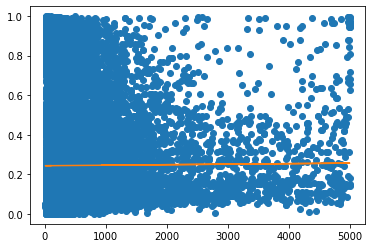

In [14]:
length_of_string = np.array([len(x) for x in df['comment_text']]).reshape(-1, 1)
reg = LinearRegression().fit(length_of_string, df['score'])
plt.plot(length_of_string, df['score'], 'o')
plt.plot(length_of_string, reg.predict(length_of_string))

Calculate the RMSE of the linear regression

In [15]:
mean_squared_error(df['score'], reg.predict(length_of_string), squared=False)

0.25721322532786994

The linear regression test shows that there is a correlation between the length of the comment and the toxicity rating. Although there are many outliers, the RMSE somewhat proves that the Perspective API has a tendency to overlook the toxicity of a comment based on the length of the comment.

Code to query the API provided from the class template

In [16]:
from googleapiclient.discovery import build
import json

def get_toxicity_score(comment):
    
  API_KEY = '' # Put your API key here
    
  client = build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
  static_discovery=False,
  )

  analyze_request = {
  'comment': { 'text': comment },
  'requestedAttributes': {'TOXICITY': {}}
  }
    
  response = client.comments().analyze(body=analyze_request).execute()
  toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
  return toxicity_score

We can call this function with original comments like this:

In [17]:
get_toxicity_score("hello")

0.05446308

Due to the constraint of one request per second, we should insert a time.sleep() statement between consecutive API calls, which will pause execution for one second.

In [18]:
comment_list = ['penis', 'PENiS', 'balls', 'gay', 'fuck', 'FuCk']

for comment in comment_list:
    score = get_toxicity_score(comment)
    print(comment, score)
    time.sleep(1)

penis 0.89693767
PENiS 0.16827652
balls 0.6364068
gay 0.77029157
fuck 0.9671429
FuCk 0.69542736


By querying some words, I discovered that casing matters for the perspective API as the example shows that 'penis' is rated .897 whereas 'PENis', which is the same word with different casing has an alarmingly lower rating of .168.

Although words like penis and gay can be used in a toxic manner, the words are scored relatively high for words that aren't necessarily toxic. These are some examples of false positives from the Perspective API and it concerns me that the comment "„Same Ukraininan vandal” — same to who? Russian nazi, stop drinking vodka!" is marked as toxic, severe_toxic, obscene, threat, insult, and identity_hate with the highest score of .998329 out of 40 thousand entries even though there are other comments that are far worse in my opinion. 

However the Perspective API aside from a few biases does a really good job of pinpointing toxic comments. I found it impressive that the API can familiarize itself with common characteristics of toxic comments and label a comment to it's respective label. Considering the many nuances a comment can have and bias found in humans, the Perspective API demonstrates the capabilities of machine learning in real life application. 